In [43]:
import pandas as pd
import random
from faker import Faker
import matplotlib.pyplot as plt

In [56]:
fake = Faker()
print(fake.first_name())
print(fake.last_name())
print(fake.phone_number())

James
Wong
+1-453-016-7897


In [63]:
ae_states = ["Maine", "New Hampshire", "Massachusetts", "Rhode Island", "Connecticut", "New York", "New Jersey", "Delaware", "Maryland","Virginia", "North Carolina", "South Carolina", "Georgia","Florida"]
empid = []
f_name  = []
l_name = []
phone = []
state = []
depid = []
sal = []
for i in range(10000):
    empid.append(i)
    f_name.append(fake.first_name())
    l_name.append(fake.last_name())
    phone.append(fake.phone_number())
    state.append(random.choice(ae_states))
    
    depid.append(random.randint(100,104))
    sal.append(random.randint(25000,75000))

In [64]:
employee = pd.DataFrame()
salary   = pd.DataFrame()
department   = pd.DataFrame()
employee['empid'] = empid
employee['f_name'] = f_name
employee['l_name'] = l_name
employee['phone'] = phone
employee['state'] = state

salary['empid'] = empid
salary['depid'] = depid
salary['salary'] =sal

depnames = ['Sales','Orders','Training','HR','Manager'] 
department['depid'] = [100,101,102,103,104]
department['depname'] = depnames

In [65]:
employee

,empid,f_name,l_name,phone,state
0,0,Madison,Murray,(279)849-6282x22564,Maryland
1,1,Jacqueline,Wilson,+1-452-697-1725x956,Georgia
2,2,Peter,Keller,8266488225,Georgia
3,3,Carlos,Williams,(021)419-3786,South Carolina
4,4,Mark,Griffin,+1-604-864-6037x76152,New York
...,...,...,...,...,...
9995,9995,Cynthia,Summers,502-605-9583x8508,New Hampshire
9996,9996,Brandon,Cobb,0161523074,Florida
9997,9997,Thomas,Ortiz,001-476-215-3121x41277,South Carolina
9998,9998,Rachel,Thomas,(779)739-4313x5114,Virginia


In [66]:
salary
    

,empid,depid,salary
0,0,103,49038
1,1,103,39191
2,2,102,45994
3,3,103,31895
4,4,104,61474
...,...,...,...
9995,9995,104,32567
9996,9996,102,64828
9997,9997,103,53205
9998,9998,103,57490


In [67]:
department

,depid,depname
0,100,Sales
1,101,Orders
2,102,Training
3,103,HR
4,104,Manager


In [76]:
df1_merged = salary.merge(department,on='depid')

      empid  depid  salary depname
0         0    103   49038      HR
1         1    103   39191      HR
2         3    103   31895      HR
3         6    103   74494      HR
4         8    103   68507      HR
...     ...    ...     ...     ...
9995   9981    100   37429   Sales
9996   9982    100   70984   Sales
9997   9983    100   37549   Sales
9998   9986    100   31903   Sales
9999   9994    100   42516   Sales

[10000 rows x 4 columns]


In [69]:
df1_group = df1_merged.groupby('depname').agg(avgsal = ('salary','mean'))
df1_group.reset_index(inplace=True)
df1_group

,depname,avgsal
0,HR,50093.410633
1,Manager,50271.135790
2,Orders,50140.367677
3,Sales,49985.545635
4,Training,50666.884087


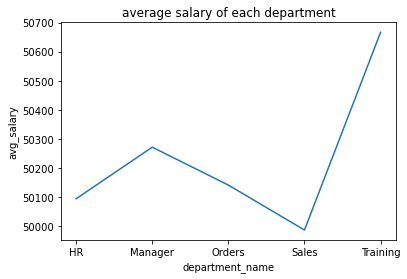

In [114]:
plt.plot(df1_group['depname'],df1_group['avgsal'])
plt.xlabel('department_name')
plt.ylabel('avg_salary')
plt.title('average salary of each department')
plt.show()

In [80]:
df2_merged = employee.merge(salary,on='empid')
df2_merged
#df2_group = df2_merged.groupby('state','depid')

,empid,f_name,l_name,phone,state,depid,salary
0,0,Madison,Murray,(279)849-6282x22564,Maryland,103,49038
1,1,Jacqueline,Wilson,+1-452-697-1725x956,Georgia,103,39191
2,2,Peter,Keller,8266488225,Georgia,102,45994
3,3,Carlos,Williams,(021)419-3786,South Carolina,103,31895
4,4,Mark,Griffin,+1-604-864-6037x76152,New York,104,61474
...,...,...,...,...,...,...,...
9995,9995,Cynthia,Summers,502-605-9583x8508,New Hampshire,104,32567
9996,9996,Brandon,Cobb,0161523074,Florida,102,64828
9997,9997,Thomas,Ortiz,001-476-215-3121x41277,South Carolina,103,53205
9998,9998,Rachel,Thomas,(779)739-4313x5114,Virginia,103,57490


In [95]:
df2_group = df2_merged.groupby(['state','depid']).agg(count = ('depid','count'))
df2_group

count
state       depid       
Connecticut 100      146
            101      142
            102      161
            103      152
            104      148
...                  ...
Virginia    100      141
            101      155
            102      139
            103      127
            104      135

[70 rows x 1 columns]

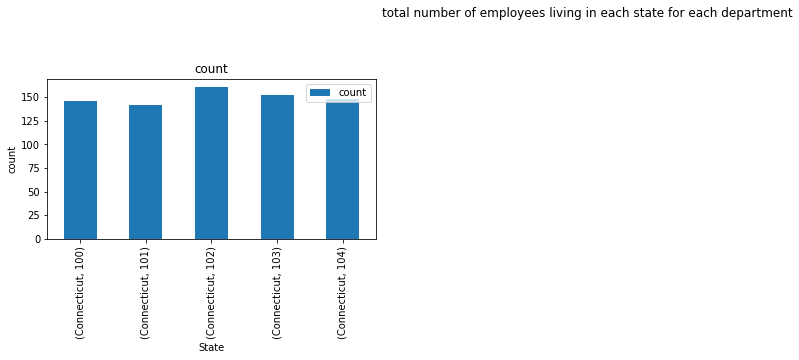

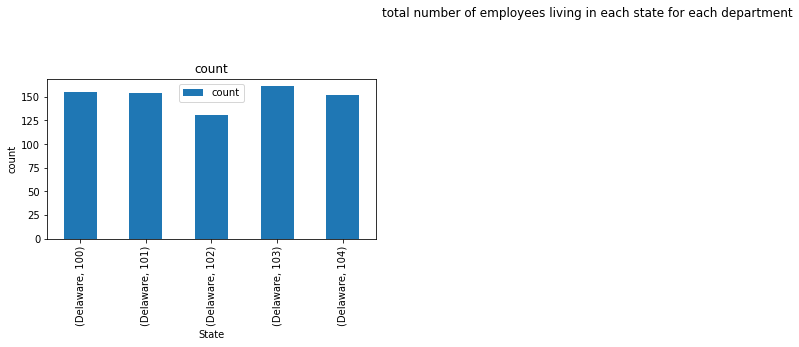

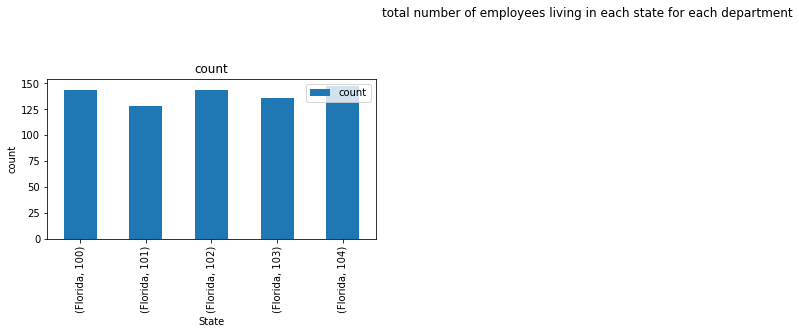

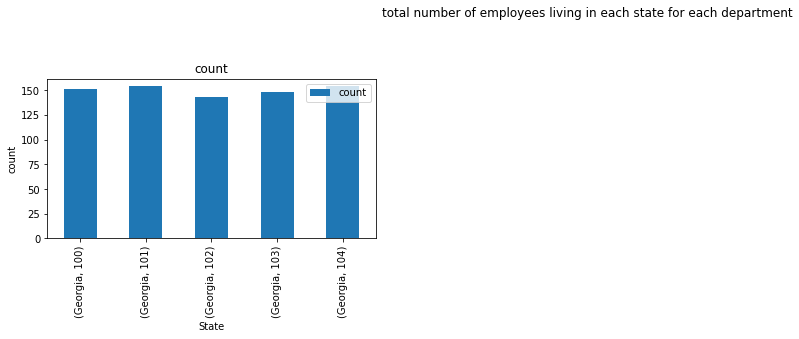

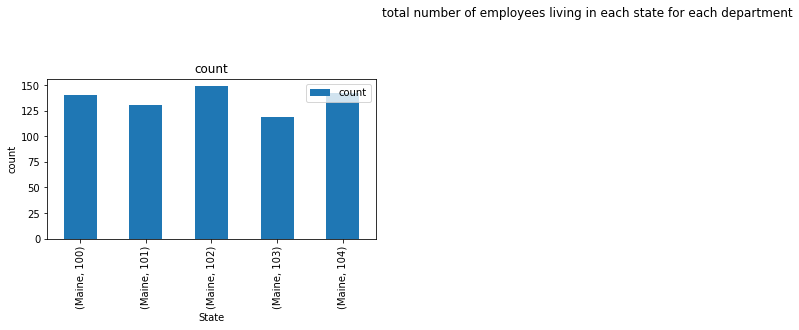

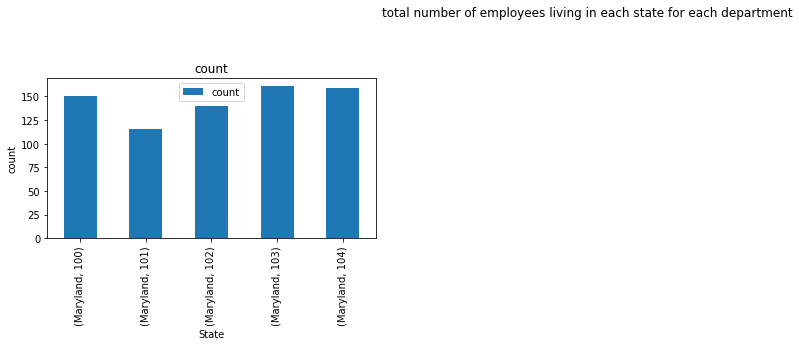

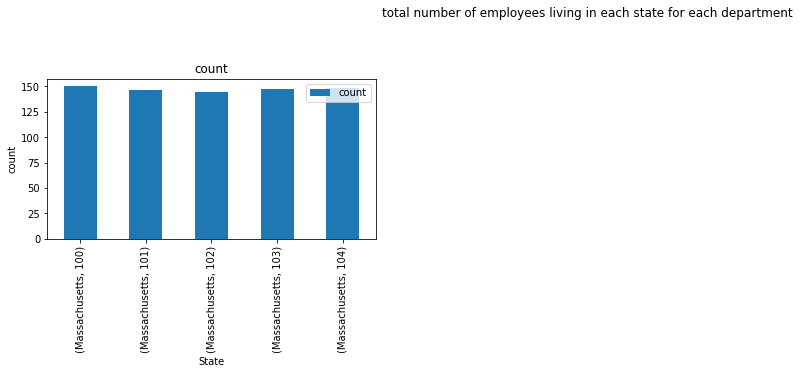

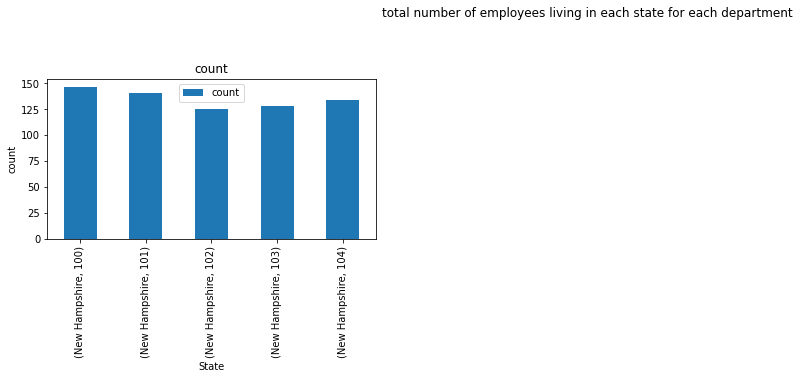

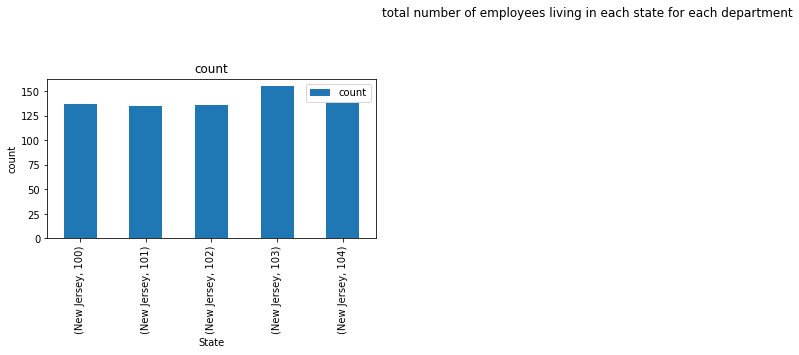

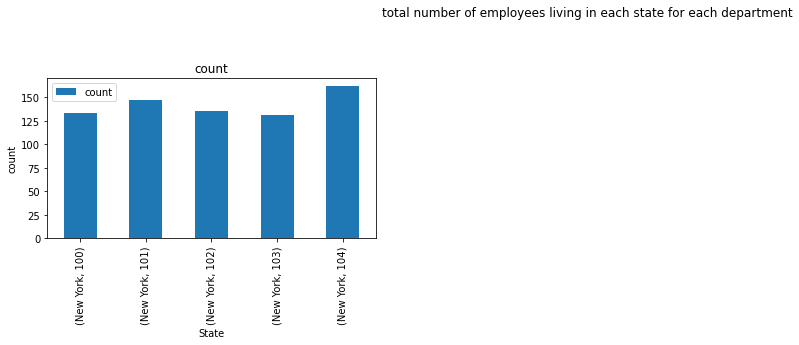

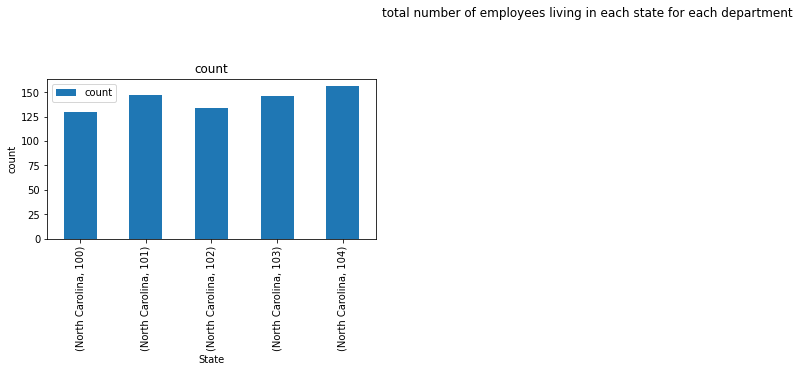

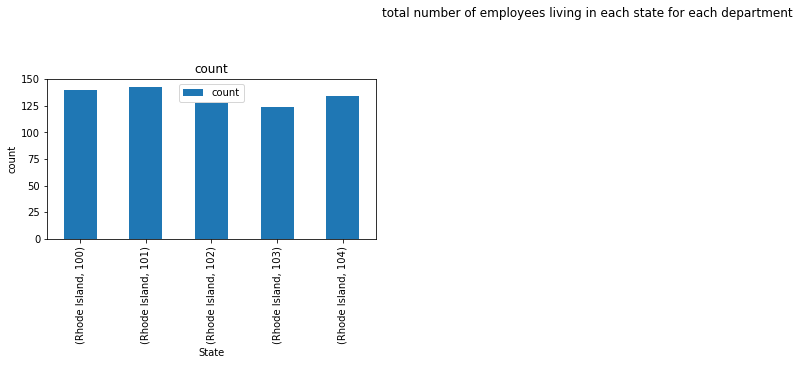

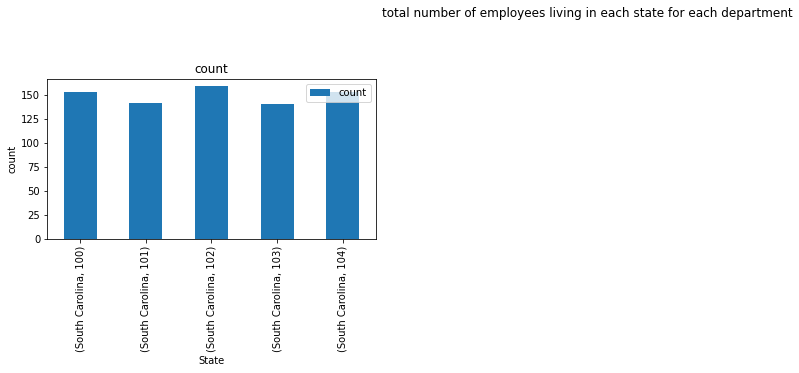

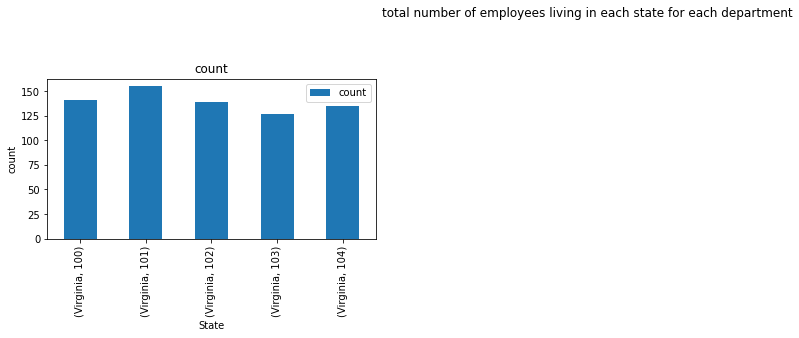

In [98]:
list1 = [0,5,10,15,20,25,30,35,40,45,50,55,60,65]
for i in list1:
        df2_group.iloc[i:i+5].plot(kind='bar', subplots=True, figsize=(20,10),layout=(3, 3), 
                title = 'total number of employees living in each state for each department',
               xlabel = 'State',
               ylabel = 'count')

In [99]:
df3_group = df2_merged.groupby('state')

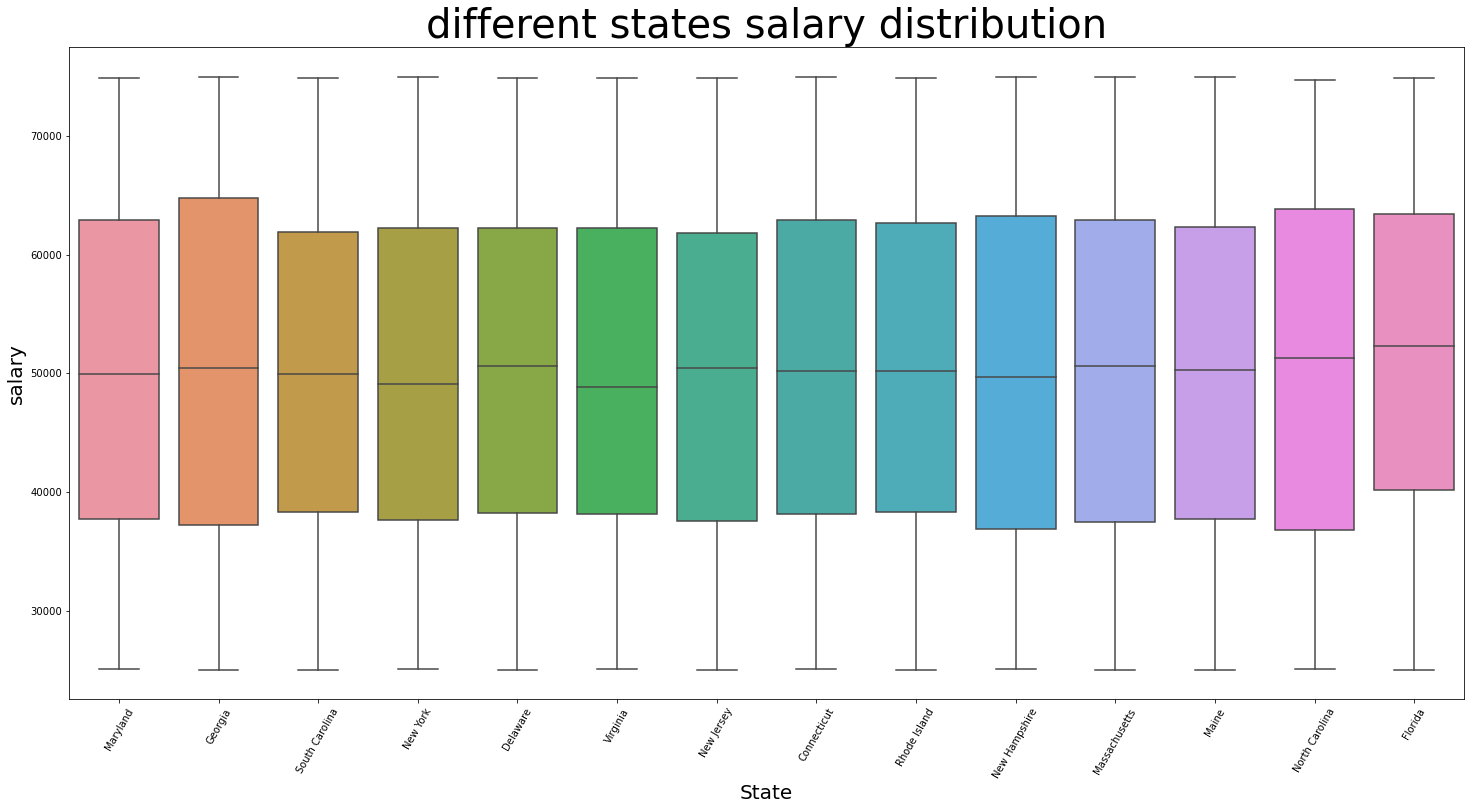

In [112]:
import seaborn as sns
plt.figure(figsize=(25,12))
sns.boxplot(x = df2_merged['state'],
            y = df2_merged['salary'])
plt.xticks(rotation = 60)
plt.xlabel('State',fontsize=20)
plt.ylabel('salary',fontsize=20)
plt.title('different states salary distribution',fontsize=40)
plt.show()

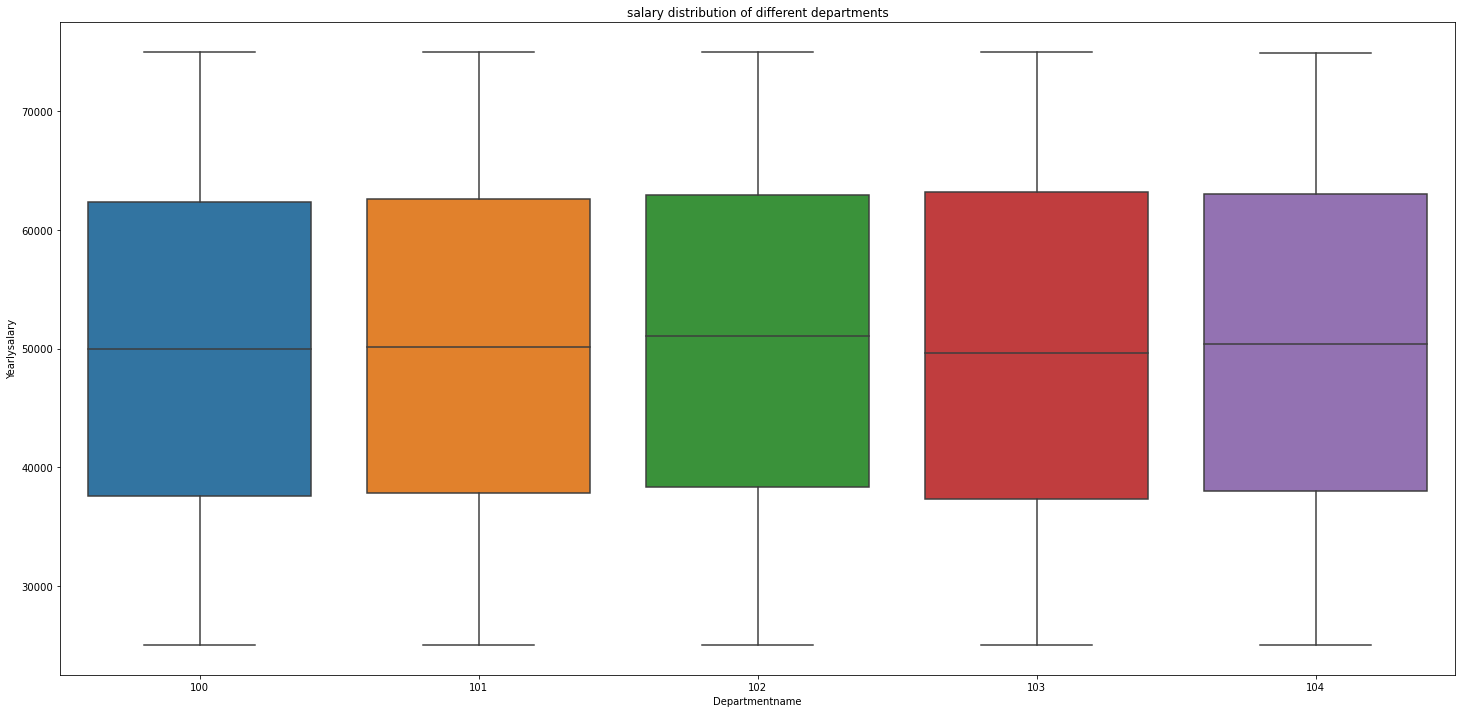

In [108]:
plt.figure(figsize=(25,12))
sns.boxplot(x = df2_merged['depid'],
            y = df2_merged['salary'])
plt.xlabel('Departmentname')
plt.ylabel('Yearlysalary')
plt.title('salary distribution of different departments')
plt.show()